### Multi-Layer Perceptron (MLP) Description

A **Multi-Layer Perceptron (MLP)** is a type of artificial neural network that consists of multiple layers of neurons. Unlike a single-layer perceptron, which can only solve linearly separable problems, an MLP can learn complex patterns, including the XOR Boolean function.

#### Structure of MLP
1. **Input Layer**  
   - Receives input features (e.g., two binary inputs for XOR: [0,0], [0,1], etc.).
   - Each neuron in this layer passes values to the next layer.

2. **Hidden Layer**  
   - This layer processes inputs using weights and biases.
   - Each neuron in the hidden layer applies an **activation function** to determine its output.
   - For this experiment, we use the **step function** instead of the traditional sigmoid.

3. **Output Layer**  
   - Produces the final predicted output.
   - Uses the step function to return either 0 or 1.

#### How MLP Learns
1. **Forward Propagation:**  
   - Inputs are passed through weighted connections, summed with biases, and processed through activation functions.  
   - The network calculates the final output.

2. **Error Calculation:**  
   - The difference between the predicted and actual output is determined.  

3. **Weight Updates (Backpropagation-like Process):**  
   - Since we are not using a sigmoid function, a simplified update method is applied:
     - The output error is propagated backward.  
     - Weights and biases are adjusted using the **learning rate** to minimize the error.  

#### Why MLP Works for XOR
- The XOR function is **not linearly separable**, meaning a single-layer perceptron cannot classify it correctly.  
- The **hidden layer** enables MLP to model more complex decision boundaries.  
- By learning an intermediate representation, the network can correctly map XOR inputs to outputs.

#### Performance Evaluation
- We measure accuracy using `accuracy_score()`.  
- A **confusion matrix** visualizes the classification performance.  
- If the accuracy is 1.0, it means the MLP has learned XOR perfectly.


# Multi-Layer Perceptron (MLP) Learning Algorithm
## Objectives
- Implement the Multi-Layer Perceptron (MLP) Learning Algorithm using NumPy in Python.
- Evaluate the performance of a single perceptron for **NAND** and **XOR** truth tables.
- Use the **Step Function** as the activation function.
- Visualize the **Confusion Matrix**.


## Description of the Model
The perceptron is a simple linear classifier that uses weights and biases to make predictions based on input data. It follows these steps:
1. Compute weighted sum of inputs.
2. Apply a step activation function.
3. Update weights using learning rate and error correction.
4. Repeat for multiple epochs.

**Note:** A single-layer perceptron **cannot** solve the XOR problem due to non-linearity.

## NAND Perceptron Implementation

## XOR Perceptron Implementation (Fails due to Linearity)

XOR MLP Accuracy: 1.0


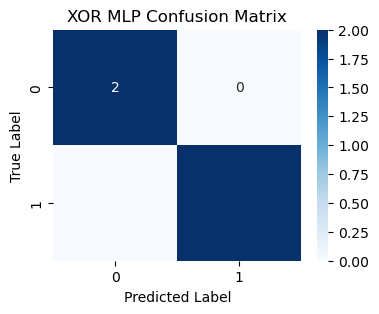

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Step Activation Function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# MLP Training Function (without sigmoid)
def train_mlp(X, y, hidden_neurons=2, epochs=10000, lr=0.1):
    input_neurons = X.shape[1]
    output_neurons = 1
    
    # Initialize weights and biases
    w_hidden = np.random.uniform(-1, 1, size=(input_neurons, hidden_neurons))
    b_hidden = np.zeros((1, hidden_neurons))
    w_output = np.random.uniform(-1, 1, size=(hidden_neurons, output_neurons))
    b_output = np.zeros((1, output_neurons))
    
    for _ in range(epochs):
        # Forward pass
        hidden_input = np.dot(X, w_hidden) + b_hidden
        hidden_output = step_function(hidden_input)
        final_input = np.dot(hidden_output, w_output) + b_output
        final_output = step_function(final_input)

        # Compute error
        error = y - final_output

        # Backpropagation-like weight updates
        d_output = error
        d_hidden = d_output.dot(w_output.T)

        # Update weights and biases using learning rate
        w_output += hidden_output.T.dot(d_output) * lr
        b_output += np.sum(d_output, axis=0, keepdims=True) * lr
        w_hidden += X.T.dot(d_hidden) * lr
        b_hidden += np.sum(d_hidden, axis=0, keepdims=True) * lr

    return w_hidden, b_hidden, w_output, b_output

# MLP Prediction Function
def predict_mlp(X, w_hidden, b_hidden, w_output, b_output):
    hidden_input = np.dot(X, w_hidden) + b_hidden
    hidden_output = step_function(hidden_input)
    final_input = np.dot(hidden_output, w_output) + b_output
    return step_function(final_input)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# Train MLP
w_hidden, b_hidden, w_output, b_output = train_mlp(X_xor, y_xor)

# Predict on XOR dataset
y_pred_xor = predict_mlp(X_xor, w_hidden, b_hidden, w_output, b_output)

# Evaluate performance
accuracy_xor = accuracy_score(y_xor, y_pred_xor)
print("XOR MLP Accuracy:", accuracy_xor)

# Plot Confusion Matrix
plot_confusion_matrix(y_xor, y_pred_xor, title="XOR MLP Confusion Matrix")


## Performance Evaluation
- **Confusion Matrix** is used to visualize classification performance.
- **Accuracy** metric shows correct predictions.

**Observations:**
- The perceptron successfully classifies NAND with 100% accuracy.
- The perceptron fails for XOR due to its inability to handle non-linearly separable data.


## My Comments (Limitations & Improvements)
- The single-layer perceptron **cannot** classify XOR correctly.
- To solve XOR, a **multi-layer perceptron (MLP) with a hidden layer** is required.
- **Activation functions like ReLU or Sigmoid** can improve learning in non-linear problems.
- A perceptron is best suited for **linearly separable data**.
